In [32]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.0.0
anyio                        3.4.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astunparse                   1.6.3
attrs                        21.2.0
Babel                        2.9.1
backcall                     0.2.0
bleach                       4.1.0
cachetools                   4.2.4
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.9
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.0
defusedxml                   0.7.1
entrypoints                  0.3
flatbuffers                  2.0
fonttools                    4.28.5
gast                         0.4.0
google-auth                  2.3.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.43.0
h5py                         2.10.0
idna  

In [33]:
!python --version

Python 3.9.9


In [34]:
# !pip install tensorflow -f https://tf.kmtea.eu/whl/stable.html

In [35]:
# !pip install opencv-python

In [36]:
# !pip install tensorflow==2.3.0

In [37]:
import keras
import glob
import numpy as np
# from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import plot_model #これはKerasのバージョンなどにより使えないのでコメントアウト
from keras.utils import np_utils #keras.utils.to_categoricalでエラーが出るので追加
# from keras.optimizers import Adam # ここでエラーとなるので以下のコードに変更
from tensorflow.keras.optimizers import Adam # 「tensorflow.」を追加
import matplotlib.pyplot as plt
import time
import cv2
import random
import os

In [38]:
# print(os.getcwd())

In [39]:
train_data_path = './dataset'
image_size = 28
color_setting = 1

In [40]:
folder = os.listdir(train_data_path)

del folder[0:3]
print(folder)

['イコール', 'カケ', 'プラス', 'マイナス', 'ワル']


In [41]:
class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')

今回のデータで分類するクラス数は「 5 」です。


In [42]:
X_image = []  
Y_label = [] 

for index, name in enumerate(folder):
    read_data = train_data_path + '/' + name
    print(read_data + '/*.jpg')
    files = glob.glob(read_data + '/*.jpg') #ここを変更。png形式のファイルを利用する場合のサンプルです。
    print('--- 読み込んだデータセットは', read_data, 'です。')
    
    for i, file in enumerate(files):  
            img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
            array = img_to_array(img)
            X_image.append(array)
            Y_label.append(index)
        
print(Y_label)

./dataset/イコール/*.jpg
--- 読み込んだデータセットは ./dataset/イコール です。
./dataset/カケ/*.jpg
--- 読み込んだデータセットは ./dataset/カケ です。
./dataset/プラス/*.jpg
--- 読み込んだデータセットは ./dataset/プラス です。
./dataset/マイナス/*.jpg
--- 読み込んだデータセットは ./dataset/マイナス です。
./dataset/ワル/*.jpg
--- 読み込んだデータセットは ./dataset/ワル です。
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [43]:
X_image = np.array(X_image)
Y_label = np.array(Y_label)

In [44]:
X_image = X_image.astype('float32') / 255

In [45]:
index_count = len(Y_label)

count_array = [] 

for num in range(index_count):
    count_array.append(num)

lr = random.sample(count_array, len(count_array))
print(lr)
# [0, 3, 1, 4, 2]

[7, 173, 127, 108, 166, 60, 169, 120, 122, 19, 65, 13, 168, 158, 164, 75, 80, 34, 6, 72, 55, 98, 29, 156, 172, 76, 15, 146, 114, 51, 83, 38, 163, 47, 138, 119, 91, 161, 160, 118, 162, 31, 42, 165, 59, 93, 95, 139, 148, 90, 82, 70, 142, 11, 124, 36, 5, 129, 50, 24, 131, 96, 143, 35, 123, 126, 152, 135, 121, 128, 20, 32, 69, 150, 159, 85, 102, 21, 116, 53, 64, 9, 14, 145, 170, 39, 137, 157, 10, 3, 44, 48, 17, 99, 67, 89, 101, 49, 23, 105, 133, 25, 136, 141, 106, 33, 112, 62, 28, 107, 167, 4, 171, 147, 45, 103, 79, 16, 78, 37, 46, 1, 144, 2, 134, 73, 140, 81, 63, 71, 115, 130, 87, 22, 125, 97, 100, 104, 94, 56, 27, 54, 12, 0, 52, 26, 66, 77, 109, 43, 88, 30, 155, 18, 57, 68, 149, 8, 61, 58, 113, 153, 132, 40, 117, 110, 92, 86, 84, 111, 154, 41, 74, 151]


3


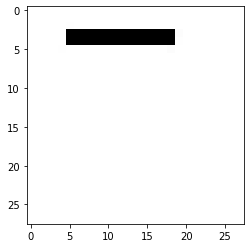

In [46]:
X_image_shuffle = []
Y_label_shuffle = []

for i in range(index_count):
    Y_label_shuffle.append(Y_label[lr[i]])
    X_image_shuffle.append(X_image[lr[i]])

print(Y_label_shuffle[2])
plt.imshow(X_image_shuffle[2])
plt.show()

In [47]:
# print(Y_label[0])
print(len(Y_label))
print(int(len(Y_label)/10))

total_count = len(Y_label)
test_count = int(len(Y_label)/10)
train_count = total_count - test_count

print(train_count)

174
17
157


In [48]:
x_train = []
y_train = []
x_test = []
y_test = []

x_train = X_image_shuffle[test_count + 1 : total_count - 1]
y_train = Y_label_shuffle[test_count + 1 : total_count - 1]
x_test = X_image_shuffle[0 : test_count]
y_test = Y_label_shuffle[0 : test_count]

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_test = np_utils.to_categorical(y_test, class_number)
y_train = np_utils.to_categorical(y_train, class_number)

In [49]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(image_size, image_size, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       18560     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 256)        

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [51]:
history = model.fit(x_train,y_train, batch_size=5, epochs=10, verbose=1)

Epoch 1/10
31/31 [==============================] - 1s 18ms/step - loss: 1.6469 - accuracy: 0.2258
Epoch 2/10
31/31 [==============================] - 1s 18ms/step - loss: 1.3995 - accuracy: 0.4194
Epoch 3/10
31/31 [==============================] - 1s 17ms/step - loss: 0.8944 - accuracy: 0.6194
Epoch 4/10
31/31 [==============================] - 1s 19ms/step - loss: 0.5714 - accuracy: 0.7806
Epoch 5/10
31/31 [==============================] - 1s 18ms/step - loss: 0.4154 - accuracy: 0.8258
Epoch 6/10
31/31 [==============================] - 1s 17ms/step - loss: 0.3968 - accuracy: 0.8581
Epoch 7/10
31/31 [==============================] - 1s 20ms/step - loss: 0.3310 - accuracy: 0.8774
Epoch 8/10
31/31 [==============================] - 1s 17ms/step - loss: 0.2214 - accuracy: 0.9355
Epoch 9/10
31/31 [==============================] - 0s 16ms/step - loss: 0.2236 - accuracy: 0.9161
Epoch 10/10
31/31 [==============================] - 1s 16ms/step - loss: 0.1457 - accuracy: 0.9355


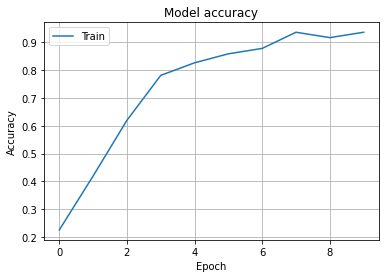

In [52]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

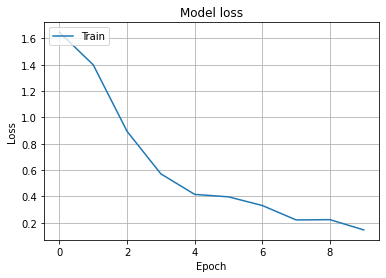

In [53]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 

Loss: 0.5900394916534424 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 82.35294222831726 % （精度 - 100% に近いほど正解に近い）


In [55]:
print(os.getcwd())

recognise_image = './dataset/output_all/purasu_images.png'
print(recognise_image)

/root/opt
./dataset/output_all/purasu_images.png


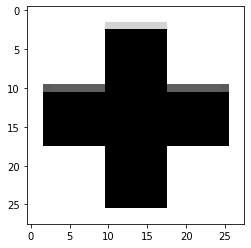

In [56]:
img = cv2.imread(recognise_image, 0)  #ここを変更。モノクロ・グレースケールの場合は「0」。カラーの場合は「1」 。         
img = cv2.resize(img, (image_size, image_size))
plt.imshow(img)
plt.gray()  #ここを変更。カラーの場合は「plt.gray()」を消す。モノクロ・グレースケールの場合は「plt.gray()」が無いと変な色になります。
plt.show()

In [57]:
img = img.reshape(image_size, image_size, color_setting).astype('float32')/255 

In [58]:
prediction = model.predict(np.array([img]), batch_size=2, verbose=1)
result = prediction[0]
result_index = np.argmax(result)
print(result)
print(result_index)
print(folder[result_index])

1/1 [==============================] - 0s 29ms/step
[1.0312024e-03 1.2199455e-03 9.9774855e-01 4.2544879e-10 2.4273442e-07]
2
プラス


In [59]:
new_dir_path_recursive = './model'
os.makedirs(new_dir_path_recursive, exist_ok=True)

In [60]:
model.save('./model/mark_classification.h5')

In [61]:
# !pip install coremltools==4.0b2 

In [62]:
# import coremltools as ct

# image_labels = [
#     'イコール', 
#     'カケ',
#     'プラス', 
#     'マイナス', 
#     'ワル'
# ]

# classifier_config = ct.ClassifierConfig(image_labels)
# image_input = ct.ImageType(shape=(1, 28, 28, 1,), scale=1/255)

# mlmodel = ct.convert("./model/mark_classification.h5",  
#                      inputs=[image_input],
#                      classifier_config=classifier_config
#                      )

# mlmodel.save('./model/h5_mark_model.mlmodel')

引用文献：
https://child-programmer.com/ai/cnn-originaldataset-samplecode/